<a href="https://colab.research.google.com/github/pratyasaswain1704/Data-Driven-Supply-Chain-Analysis/blob/main/DATA_DRIVEN_SUPPLY_CHAIN_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from plotly.offline import iplot, init_notebook_mode
import pickle
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
from datetime import datetime
import plotly.express as px



In [10]:
from google.colab import files
uploaded = files.upload()

# After upload, read into pandas:
import pandas as pd
SC = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='latin1')

Saving DataCoSupplyChainDataset.csv to DataCoSupplyChainDataset (2).csv


In [11]:
SC.shape

(180519, 53)

In [12]:
SC.dtypes

,0
Type,object
Days for shipping (real),int64
Days for shipment (scheduled),int64
Benefit per order,float64
Sales per customer,float64
Delivery Status,object
Late_delivery_risk,int64
Category Id,int64
Category Name,object
Customer City,object


In [13]:
SC.head(10)


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class
5,TRANSFER,6,4,18.580000,294.980011,Shipping canceled,0,73,Sporting Goods,Tonawanda,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/19/2018 11:03,Standard Class
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 10:42,First Class
7,TRANSFER,2,1,68.430000,285.140015,Late delivery,1,73,Sporting Goods,Miami,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 10:21,First Class
8,CASH,3,2,133.720001,278.589996,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 10:00,Second Class
9,CASH,2,1,132.149994,275.309998,Late delivery,1,73,Sporting Goods,San Ramon,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 9:39,First Class


In [14]:
SC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [15]:
SC.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


DATA CLEANING

In [16]:
np.sum(SC.isna()) #Checking the number of missing values for each variable

,0
Type,0
Days for shipping (real),0
Days for shipment (scheduled),0
Benefit per order,0
Sales per customer,0
Delivery Status,0
Late_delivery_risk,0
Category Id,0
Category Name,0
Customer City,0


In [17]:
SC['Customer Zipcode']=SC['Customer Zipcode'].fillna(0)

In [18]:
SC['Order Zipcode']=SC['Order Zipcode'].fillna(0)

In [19]:
SC['Customer Fname']=SC['Customer Fname'].fillna("NotDetermined")

In [20]:
SC['Customer Full Name'] = SC['Customer Fname'].astype(str)+SC['Customer Lname'].astype(str)

In [21]:
SCData=SC.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Product Description','Product Image','Order Zipcode','Customer Zipcode'],axis=1)
SCData.shape

(180519, 44)

In [22]:
SCData.columns #Checking col names after hiding personal info

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id', 'Product Name',
       'Product Price', 'shipping date (DateOrders)', 'Shipping Mode',
       'Customer Full Name'],
      dtype='object')

In [23]:
SCData.columns = [col.lower().replace(' ', '_') for col in SCData.columns]
SCData.rename(columns=lambda x: x.replace("(", "").replace(")", ""), inplace=True)

In [24]:
SCData.columns

Index(['type', 'days_for_shipping_real', 'days_for_shipment_scheduled',
       'benefit_per_order', 'sales_per_customer', 'delivery_status',
       'late_delivery_risk', 'category_id', 'category_name', 'customer_city',
       'customer_country', 'customer_id', 'customer_segment', 'customer_state',
       'department_id', 'department_name', 'latitude', 'longitude', 'market',
       'order_city', 'order_country', 'order_customer_id',
       'order_date_dateorders', 'order_id', 'order_item_cardprod_id',
       'order_item_discount', 'order_item_discount_rate', 'order_item_id',
       'order_item_product_price', 'order_item_profit_ratio',
       'order_item_quantity', 'sales', 'order_item_total',
       'order_profit_per_order', 'order_region', 'order_state', 'order_status',
       'product_card_id', 'product_category_id', 'product_name',
       'product_price', 'shipping_date_dateorders', 'shipping_mode',
       'customer_full_name'],
      dtype='object')

DATA VISUALISATION:


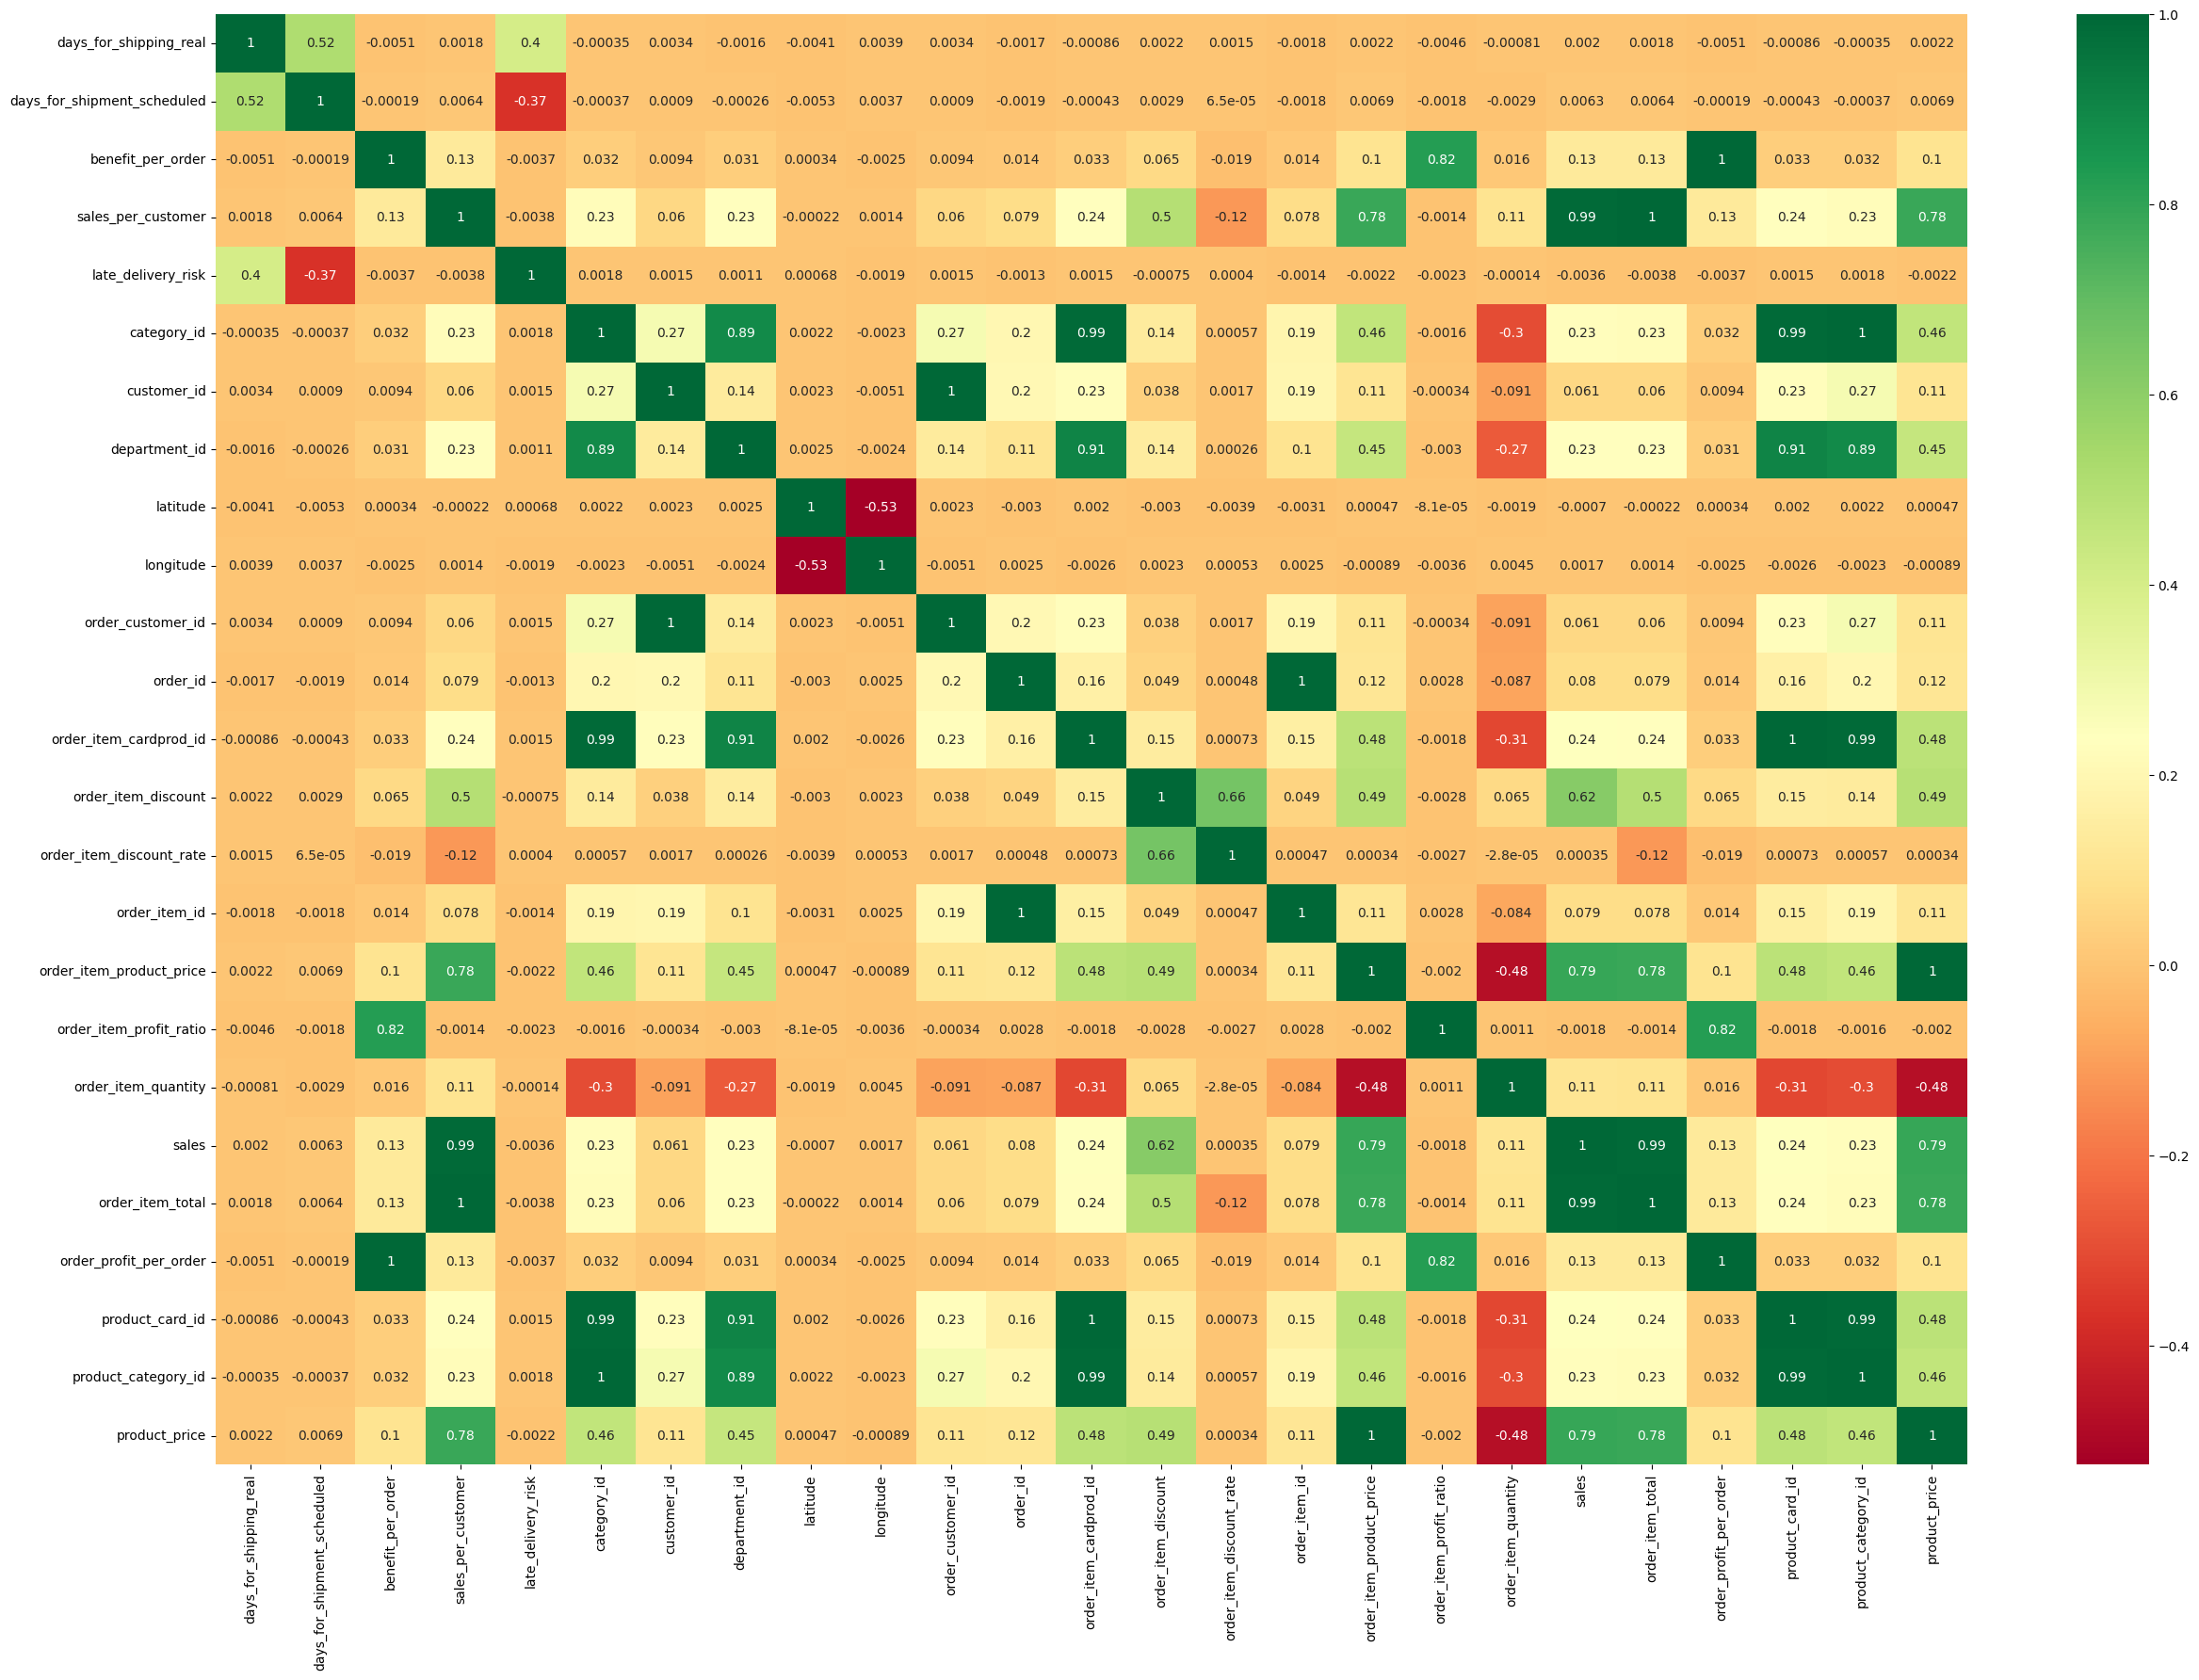

In [26]:
corrmap = SCData.select_dtypes(include=np.number).corr()
top=corrmap.index
plt.figure(figsize=(30,20))
g=sns.heatmap(SCData[top].corr(),annot=True,cmap="RdYlGn")

this heatmap contains a lot of values to properly understand the correlation behind several features, lets remove some unwanted features and some duplicate columns.


<Axes: >

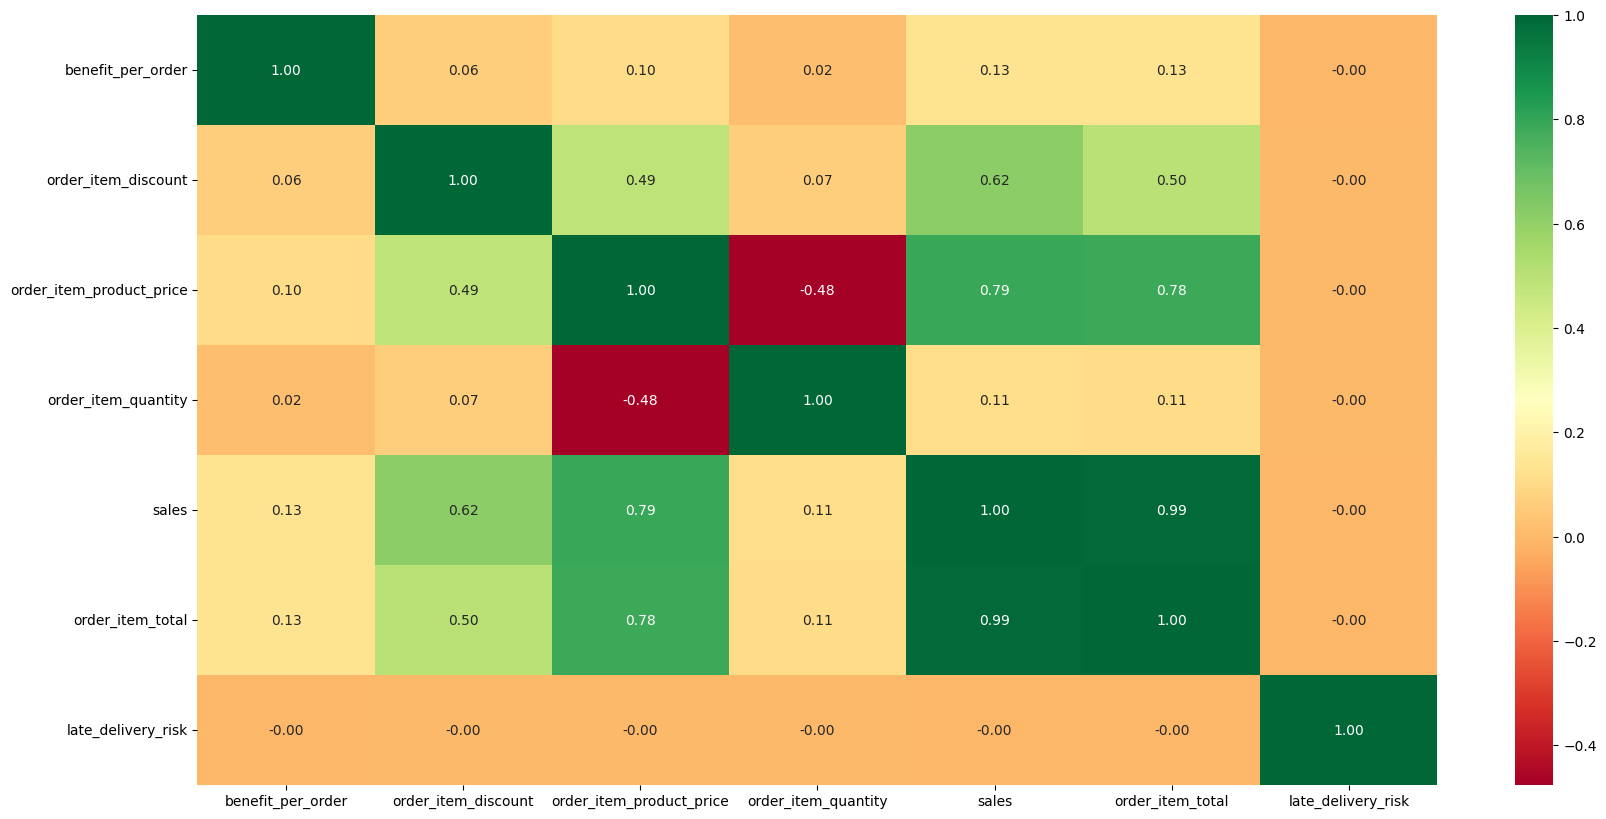

In [28]:
SC_features = SCData[['shipping_date_dateorders', 'benefit_per_order',
       'order_date_dateorders',
       'order_item_discount',
       'order_item_product_price',
       'order_item_quantity', 'sales', 'order_item_total','late_delivery_risk']].copy()

# Convert date columns to datetime objects
SC_features['shipping_date_dateorders'] = pd.to_datetime(SC_features['shipping_date_dateorders'])
SC_features['order_date_dateorders'] = pd.to_datetime(SC_features['order_date_dateorders'])


# Select only numeric columns for correlation
numeric_SC_features = SC_features.select_dtypes(include=np.number)

fig = plt.figure(figsize=(20,10))
sns.heatmap(numeric_SC_features.corr(), annot = True, fmt = '.2f', cmap = "RdYlGn")

As shown in the heatmap chart:

1-'order_item_total' has a direct relationship with order_item_discount', 'order_item_product_price', 'order_item_quantity', and 'sales'.

The following formula, which was discovered through dataset analysis, can explain the cause:

Order Item Total = Sales - Order Item Discount

2-'sales' has a direct relationship with 'order_item_discount', and 'order_item_product_price'.

The following relationships help to explain the cause:

Sales = Product Price * Order Item Quantity

Order Item Discount = Sales * Order Item Discount Rate

3-The relationship between 'order_item_quantity' and 'order_item_product_price' is inverse.

Upon reviewing the dataset, it was found that products with high prices only had one order, while products priced between 10 and 100 had five orders. In other words, only one order has been made for the expensive items.


In [29]:
Delivery=SCData.groupby('delivery_status')
Market = SCData.groupby('market')
Region = SCData.groupby('order_region')
Customer=SCData.groupby('customer_segment')
Category=SCData.groupby('category_name')
Shipping=SCData.groupby('shipping_mode')


In [31]:
SC.shape

(180519, 54)

CONSUMER ANALYSIS


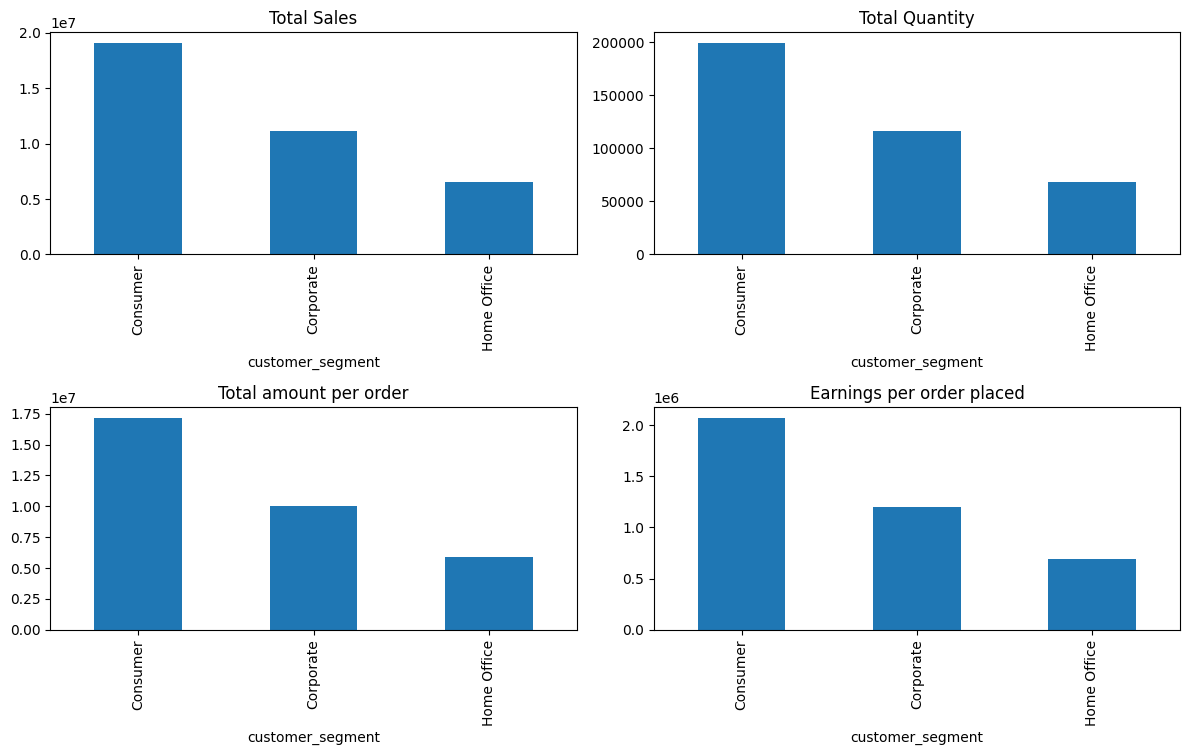

In [34]:
plt.figure(figsize=(8,8))
plt.subplot(4, 2, 1)
Customer['sales'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total Sales")

plt.subplot(4, 2, 2)
Customer['order_item_quantity'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total Quantity")

plt.subplot(4, 2, 3)
Customer['order_item_total'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total amount per order")

plt.subplot(4, 2, 4)
Customer['benefit_per_order'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Earnings per order placed")

plt.tight_layout()
plt.show()

data_Customer_Segment=SCData.groupby(['customer_segment'])['order_id'].count().reset_index(name='order_item_quantity').sort_values(by= 'order_item_quantity', ascending= False)
px.pie(data_Customer_Segment, values='order_item_quantity', names= 'customer_segment' , title= 'Number of Orders per Customer Segments',
       color='customer_segment',
             color_discrete_map={'Consumer':'yellow',
                                 'Corporate':'green',
                                 'Home Office':'red'})

MARKET ANALYSIS

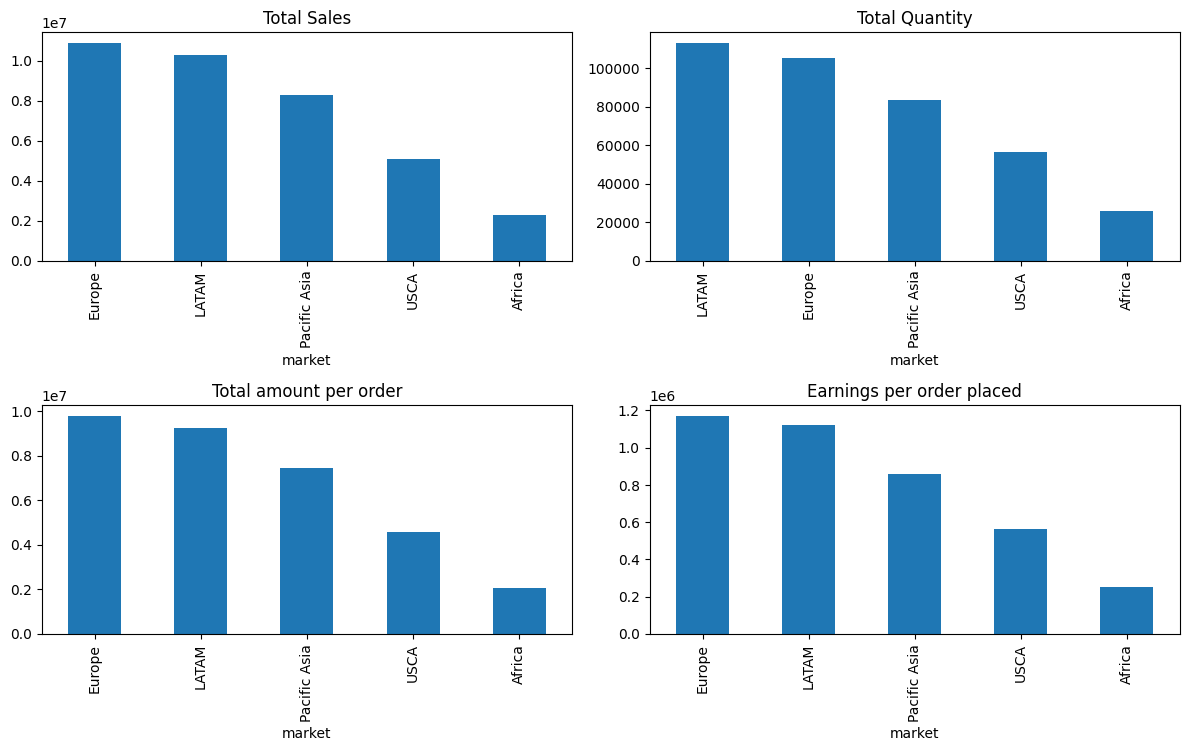

In [35]:
plt.figure(figsize=(8,8))
plt.subplot(4, 2, 1)
Market['sales'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total Sales")

plt.subplot(4, 2, 2)
Market['order_item_quantity'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total Quantity")

plt.subplot(4, 2, 3)
Market['order_item_total'].sum().sort_values(ascending=False).plot.bar(figsize=(18,14), title="Total amount per order")

plt.subplot(4, 2, 4)
Market['benefit_per_order'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Earnings per order placed")

plt.tight_layout()
plt.show()

data_Market=SCData.groupby(['market'])['order_id'].count().reset_index(name='order_item_quantity').sort_values(by= 'order_item_quantity', ascending= False)
px.pie(data_Market, values='order_item_quantity', names= 'market' , title= 'Number of Orders per Market',
       color='market',
             color_discrete_map={'Europe':'darkblue',
                                 'LATAM':'magenta',
                                 'Pacific Asia':'green',
                              'USCA':'yellow',
                                'Africa':'royalblue'})

PRODUCT ANALYSIS

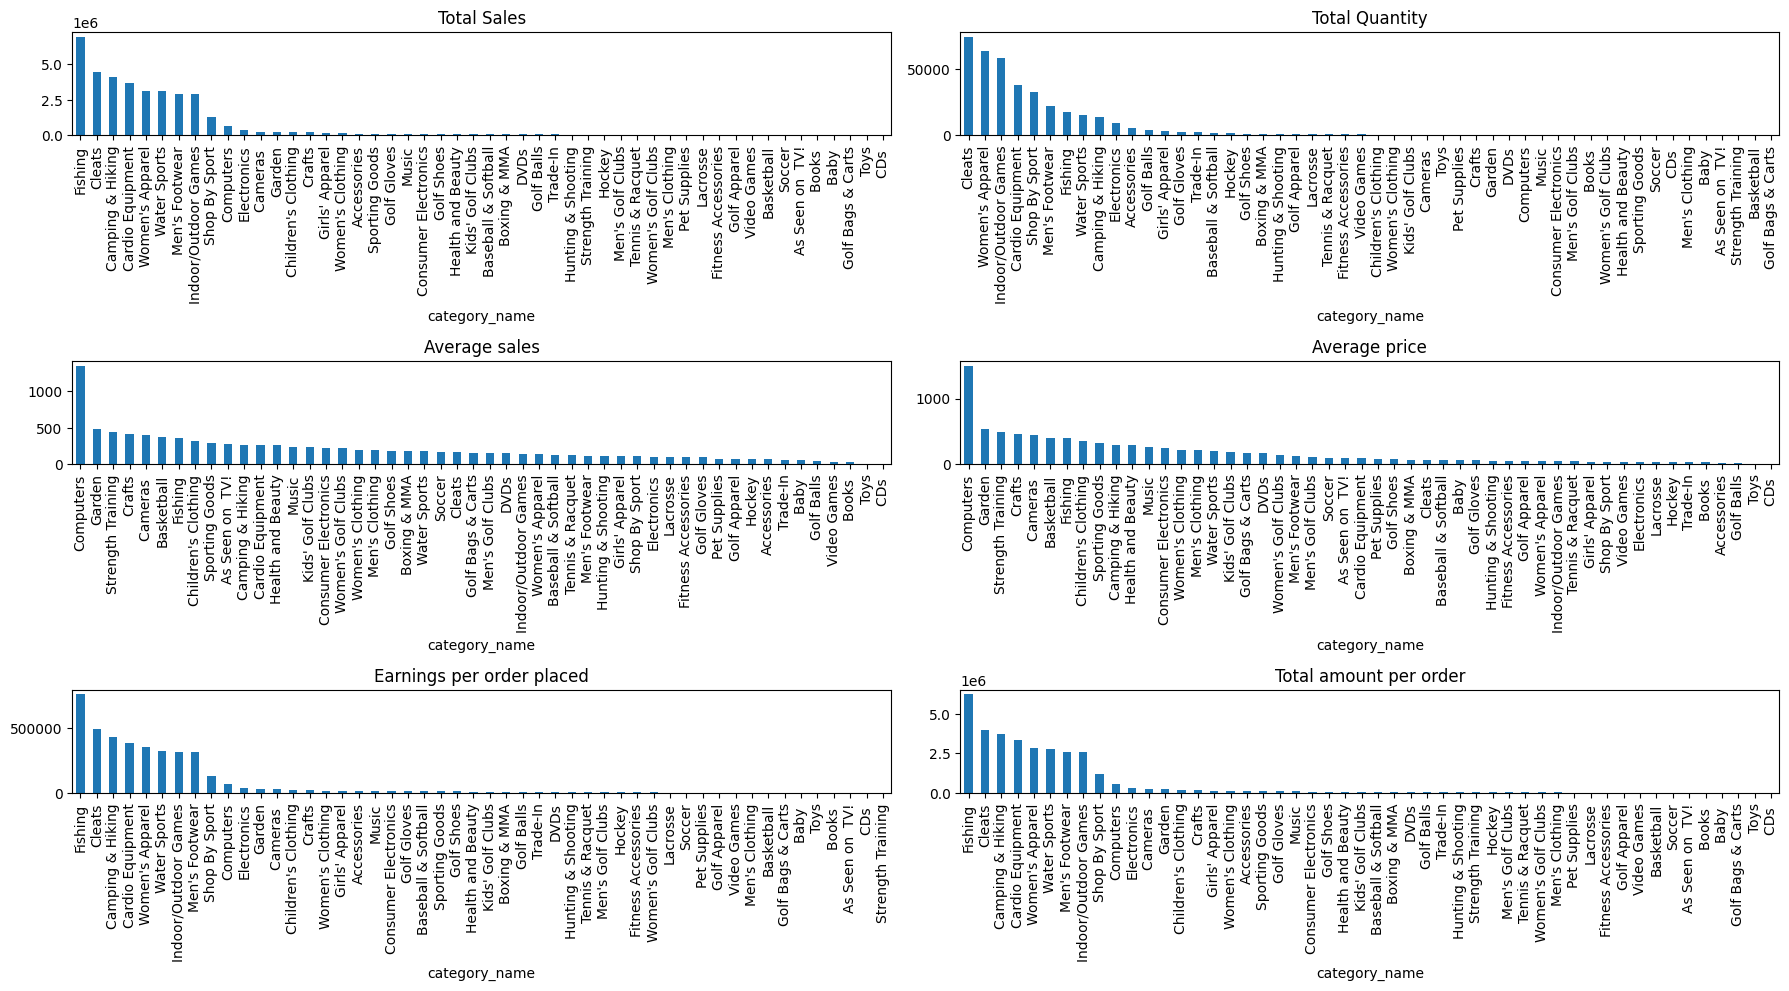

In [36]:
plt.figure(figsize=(10,12))
plt.subplot(6, 2, 1)
Category['sales'].sum().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Total Sales")

plt.subplot(6, 2, 2)
Category['order_item_quantity'].sum().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Total Quantity")

plt.subplot(6, 2, 3)
Category['sales_per_customer'].mean().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Average sales")

plt.subplot(6, 2, 4)
Category['product_price'].mean().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Average price")

plt.subplot(6, 2, 5)
Category['benefit_per_order'].sum().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Earnings per order placed")

plt.subplot(6, 2, 6)
Category['order_item_total'].sum().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Total amount per order")


plt.tight_layout()
plt.show()

REVENUE VS LATE DELIVERIES

Total Revenue with orders 7850450.319819024


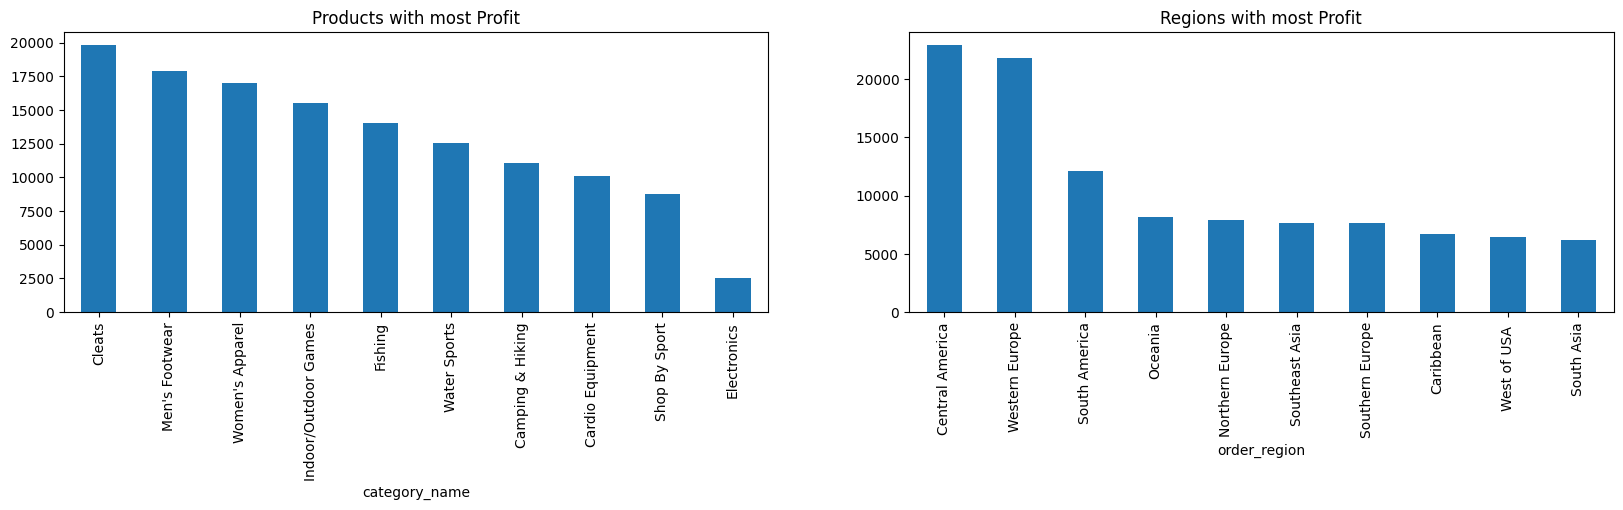

In [37]:
Revenue = SCData[(SCData['benefit_per_order']>0)]
plt.figure(figsize=(10,12))
plt.subplot(2, 2, 1)
Revenue['category_name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Products with most Profit")
plt.subplot(2, 2, 2)
Revenue['order_region'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Regions with most Profit")
print('Total Revenue with orders',Revenue['benefit_per_order'].sum())#Sum of total sales which are Profit

<Axes: title={'center': 'Top 10 Regions with most Late Deliveries'}, xlabel='order_region'>

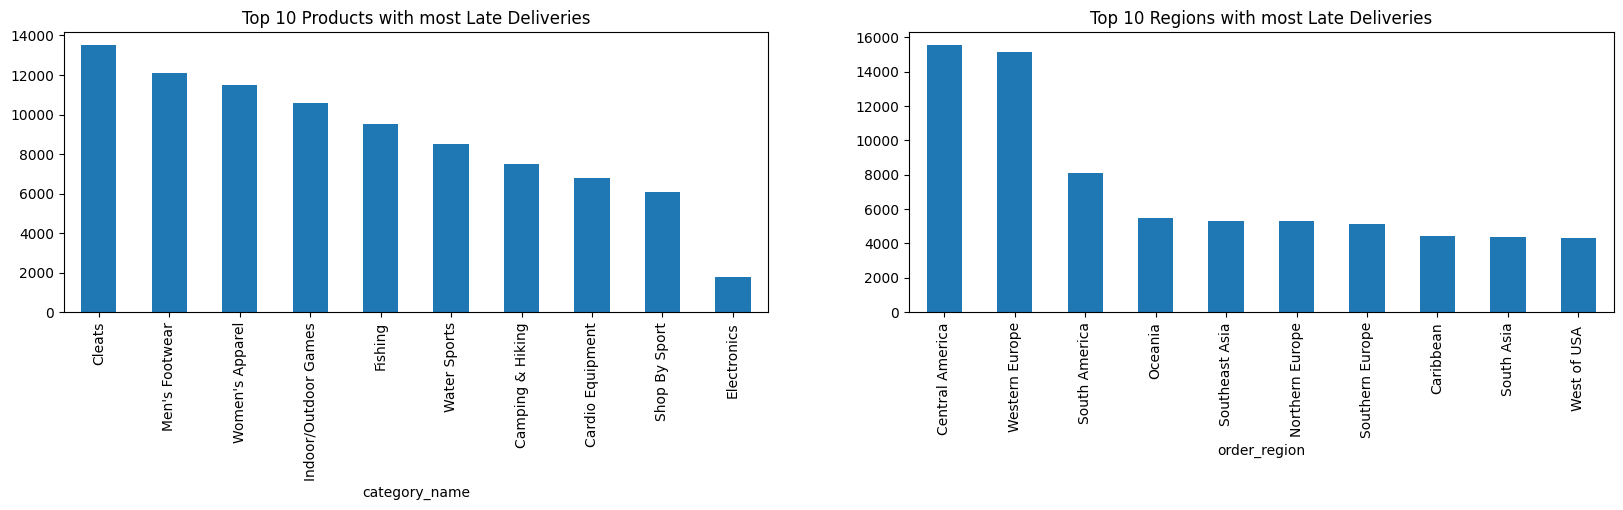

In [38]:
late_delivery = SCData[(SCData['delivery_status'] == 'Late delivery')]#Filtering columns with late delivery status
plt.figure(figsize=(10,12))
plt.subplot(2, 2, 1)
late_delivery['category_name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Top 10 Products with most Late Deliveries")#Top 10 products with most late deliveries
plt.subplot(2, 2, 2)
late_delivery['order_region'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Top 10 Regions with most Late Deliveries")#Top 10regions with most late deliveries

In [39]:
data_Shippment=SCData.groupby(['shipping_mode'])['order_id'].count().reset_index(name='order_item_quantity').sort_values(by= 'order_item_quantity', ascending= False)
px.pie(data_Shippment, values='order_item_quantity', names= 'shipping_mode' , title= 'Shippment Modes',
       color='shipping_mode',
             color_discrete_map={'First Class':'darkblue',
                                 'Same Day':'cyan',
                                 'Second Class':'magenta',
                              'Standard Class':'green'})

In [40]:
data_Delivery=SCData.groupby(['delivery_status'])['order_id'].count().reset_index(name='order_item_quantity').sort_values(by= 'order_item_quantity', ascending= False)
px.pie(data_Delivery, values='order_item_quantity', names= 'delivery_status' , title= 'Delivery Status',
       color='delivery_status',
             color_discrete_map={'Advance shipping':'blue',
                                 'Late delivery':'red',
                                 'Shipping canceled':'yellow',
                              'Shipping on time':'green'})

In [41]:
SCData["late_days"] = SCData.days_for_shipping_real - SCData.days_for_shipment_scheduled
total = SCData.groupby("shipping_mode", as_index = False).agg(count = ("shipping_mode", "count"))
total

ship_mode = SCData.groupby(["shipping_mode", "delivery_status"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))

ship_mode = ship_mode.merge(total, on = "shipping_mode", how = "left")
ship_mode.rename(columns={'count': 'total_number'}, inplace=True)
ship_mode["percentage"] = ship_mode.number/ship_mode.total_number*100

x = ["First Class", "Same Day", "Second Class", "Standard Class"]
for y in x:
    mask = ship_mode[ship_mode["shipping_mode"] == y]
    mask = mask.pivot(index='shipping_mode', columns='delivery_status', values=['percentage'])
    exec(f"{y.lower().replace(' ', '_')} = mask")

ship_mode_graph = pd.concat([first_class, second_class, standard_class, same_day])

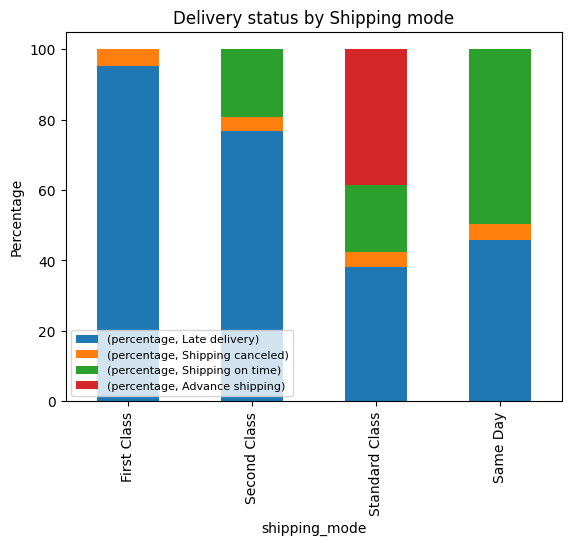

In [42]:
ship_mode_graph.plot(kind='bar', stacked=True)
plt.xlabel('shipping_mode')
plt.ylabel('Percentage')
plt.title('Delivery status by Shipping mode')
plt.legend(loc='lower left', prop={'size': 8})

<Axes: xlabel='days_for_shipment_scheduled', ylabel='days_for_shipping_real'>

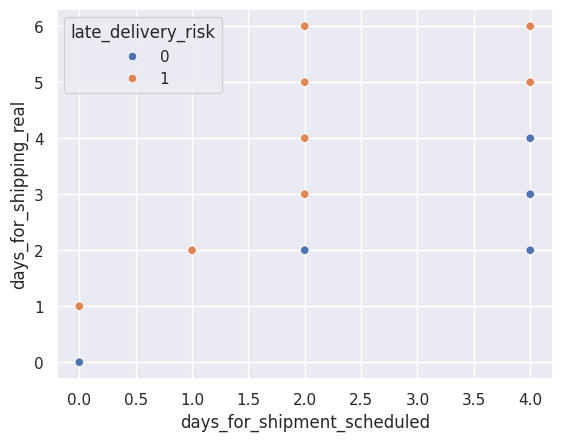

In [43]:
sns.set()
sns.scatterplot(x="days_for_shipment_scheduled",y="days_for_shipping_real",hue="late_delivery_risk",data=SCData)

In [44]:
data_Payment=SCData.groupby(['type'])['order_id'].count().reset_index(name='order_item_quantity').sort_values(by= 'order_item_quantity', ascending= False)
px.pie(data_Payment, values='order_item_quantity', names= 'type' , title= 'Payment Methods',
       color='type',
             color_discrete_map={'CASH':'darkblue',
                                 'DEBIT':'magenta',
                                 'PAYMENT':'green',
                              'TRANSFER':'yellow'})

In [45]:
reg_SC = SCData.copy()

In [46]:
le = preprocessing.LabelEncoder()# create the Labelencoder object
reg_SC['market']= le.fit_transform(reg_SC['market'])#convert the categorical columns into numeric
reg_SC['type']= le.fit_transform(reg_SC['type'])
reg_SC['product_name']= le.fit_transform(reg_SC['product_name'])
reg_SC['customer_segment']= le.fit_transform(reg_SC['customer_segment'])
reg_SC['order_region']= le.fit_transform(reg_SC['order_region'])
reg_SC['category_name']= le.fit_transform(reg_SC['category_name'])
reg_SC['shipping_mode']= le.fit_transform(reg_SC['shipping_mode'])
reg_SC['delivery_status']= le.fit_transform(reg_SC['delivery_status'])
reg_SC['customer_country']  = le.fit_transform(reg_SC['customer_country'])
reg_SC['customer_state']= le.fit_transform(reg_SC['customer_state'])
reg_SC['order_city'] = le.fit_transform(reg_SC['order_city'])
reg_SC['customer_city']= le.fit_transform(reg_SC['customer_city'])
reg_SC['department_name']= le.fit_transform(reg_SC['department_name'])
reg_SC['order_state'] = le.fit_transform(reg_SC['order_state'])
reg_SC['order_status'] = le.fit_transform(reg_SC['order_status'])
reg_SC['order_country']= le.fit_transform(reg_SC['order_country'])

In [47]:
reg_SC['Intercept'] = 1

In [48]:
independants=reg_SC[['Intercept',
       'order_item_product_price','order_country','order_item_discount',
      'order_profit_per_order','order_item_quantity','delivery_status','customer_country','customer_state','order_city','customer_city','department_name','order_state','order_status',
'market','type','product_name','customer_segment','order_region','category_name','shipping_mode']]
ols_model = sm.OLS(reg_SC['order_item_total'], independants)
results = ols_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       order_item_total   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 1.043e+05
Date:                Fri, 03 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:33:28   Log-Likelihood:            -8.9208e+05
No. Observations:              180519   AIC:                         1.784e+06
Df Residuals:                  180498   BIC:                         1.784e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -35.4732      0.637    -55.714      0.000     -36.721     -34.225
order_item_product_price     0.9688      0.001   1070.831      0.000       0.967       0.971
order_country               -0.0022      0.002     -1.075      0.282      -0.006       0.002
order_item_discount         -0.6025      0.005   -132.234      0.000      -0.611      -0.594
order_profit_per_order       0.0120      0.001     15.571      0.000       0.010       0.013
order_item_quantity         53.7354      0.071    751.562      0.000      53.595      53.876
delivery_status              0.0821      0.082      1.001      0.317      -0.079       0.243
customer_country             0.0980      0.231      0.423      0.672      -0.356       0.552
customer_state               0.0065      0.008      0.846      0.397      -0.009       0.021
order_city                4.667e-05   8.22e-05      0.568      0.570      -0.000       0.000
customer_city                0.0009      0.001      1.541      0.123      -0.000       0.002
department_name             -1.2469      0.034    -36.701      0.000      -1.313      -1.180
order_state              -9.184e-05      0.000     -0.338      0.735      -0.001       0.000
order_status                -0.0678      0.060     -1.135      0.256      -0.185       0.049
market                      -0.4648      0.071     -6.502      0.000      -0.605      -0.325
type                         0.0599      0.136      0.441      0.659      -0.206       0.326
product_name                 0.0320      0.004      7.565      0.000       0.024       0.040
customer_segment            -0.0677      0.105     -0.647      0.517      -0.273       0.137
order_region                -0.0057      0.012     -0.472      0.637      -0.029       0.018
category_name               -0.6523      0.006   -105.529      0.000      -0.664      -0.640
shipping_mode                0.0607      0.073      0.835      0.404      -0.082       0.203
==============================================================================
Omnibus:                    70854.355   Durbin-Watson:                   0.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           845376.317
Skew:                           1.554   Prob(JB):                         0.00
Kurtosis:                      13.136   Cond. No.                     1.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
independants=reg_SC[['Intercept',
       'order_item_product_price','order_item_discount',
       'order_item_quantity','order_profit_per_order','department_name',
'market','product_name','category_name']]
ols_model = sm.OLS(reg_SC['order_item_total'], independants)
results = ols_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       order_item_total   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.607e+05
Date:                Fri, 03 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:36:42   Log-Likelihood:            -8.9208e+05
No. Observations:              180519   AIC:                         1.784e+06
Df Residuals:                  180510   BIC:                         1.784e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -35.2640      0.419    -84.072      0.000     -36.086     -34.442
order_item_product_price     0.9688      0.001   1071.213      0.000       0.967       0.971
order_item_discount         -0.6024      0.005   -132.227      0.000      -0.611      -0.594
order_item_quantity         53.7350      0.071    751.644      0.000      53.595      53.875
order_profit_per_order       0.0120      0.001     15.569      0.000       0.010       0.013
department_name             -1.2470      0.034    -36.711      0.000      -1.314      -1.180
market                      -0.4478      0.069     -6.456      0.000      -0.584      -0.312
product_name                 0.0319      0.004      7.551      0.000       0.024       0.040
category_name               -0.6523      0.006   -105.537      0.000      -0.664      -0.640
==============================================================================
Omnibus:                    70864.551   Durbin-Watson:                   0.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           845643.849
Skew:                           1.555   Prob(JB):                         0.00
Kurtosis:                      13.137   Cond. No.                     1.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 0, 'Order Profit Per Order')

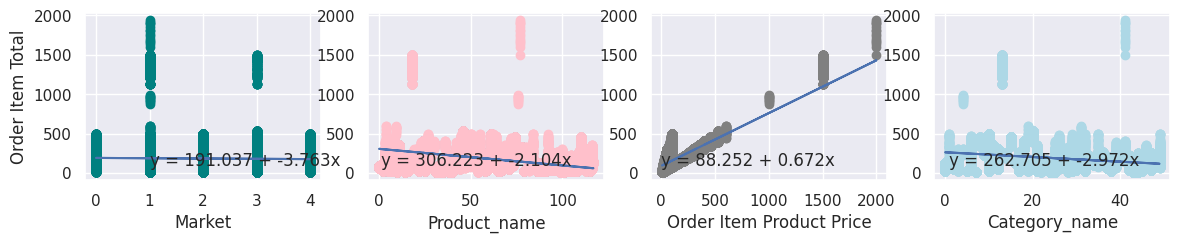

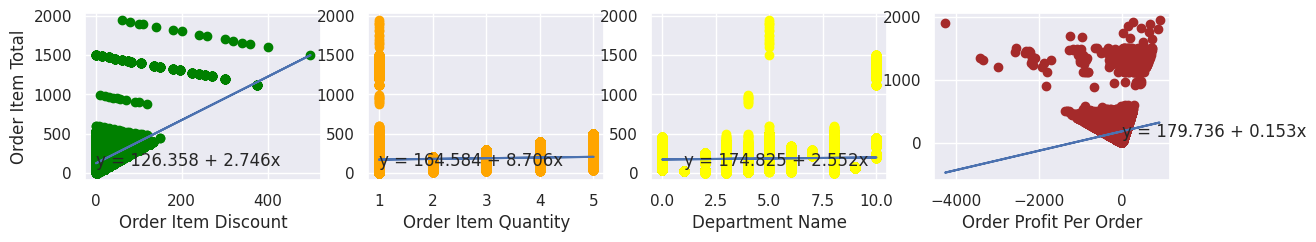

In [50]:
plt.figure(figsize=(14,10))
plt.subplot(4, 4, 1)
a, b = np.polyfit(reg_SC['market'], reg_SC['order_item_total'], 1)#find line of best fit
plt.scatter(reg_SC['market'], reg_SC['order_item_total'], color='teal')#add points to plot
plt.plot(reg_SC['market'], a*reg_SC['market']+b)#add line of best fit to plot
plt.text(1,90, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)#add fitted regression equation to plot
plt.xlabel('Market')#add axis labels
plt.ylabel('Order Item Total')


plt.subplot(4, 4, 2)
a, b = np.polyfit(reg_SC['product_name'], reg_SC['order_item_total'], 1)#find line of best fit
plt.scatter(reg_SC['product_name'], reg_SC['order_item_total'], color='pink')#add points to plot
plt.plot(reg_SC['product_name'], a*reg_SC['product_name']+b)#add line of best fit to plot
plt.text(1,90, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)#add fitted regression equation to plot
plt.xlabel('Product_name')#add axis labels

plt.subplot(4, 4, 3)
a, b = np.polyfit(reg_SC['order_item_product_price'], reg_SC['order_item_total'], 1)#find line of best fit
plt.scatter(reg_SC['order_item_product_price'], reg_SC['order_item_total'], color='grey')#add points to plot
plt.plot(reg_SC['order_item_product_price'], a*reg_SC['order_item_product_price']+b)#add line of best fit to plot
plt.text(1,90, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)#add fitted regression equation to plot
plt.xlabel('Order Item Product Price')#add axis labels


plt.subplot(4,4, 4)
a, b = np.polyfit(reg_SC['category_name'], reg_SC['order_item_total'], 1)#find line of best fit
plt.scatter(reg_SC['category_name'], reg_SC['order_item_total'], color='lightblue')#add points to plot
plt.plot(reg_SC['category_name'], a*reg_SC['category_name']+b)#add line of best fit to plot
plt.text(1,90, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)#add fitted regression equation to plot
plt.xlabel('Category_name')#add axis labels

plt.figure(figsize=(14,10))
plt.subplot(4, 4, 1)
a, b = np.polyfit(reg_SC['order_item_discount'], reg_SC['order_item_total'], 1)#find line of best fit
plt.scatter(reg_SC['order_item_discount'], reg_SC['order_item_total'], color='green')#add points to plot
plt.plot(reg_SC['order_item_discount'], a*reg_SC['order_item_discount']+b)#add line of best fit to plot
plt.text(1,90, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)#add fitted regression equation to plot
plt.xlabel('Order Item Discount')#add axis labels
plt.ylabel('Order Item Total')

plt.subplot(4, 4, 2)
a, b = np.polyfit(reg_SC['order_item_quantity'], reg_SC['order_item_total'], 1)#find line of best fit
plt.scatter(reg_SC['order_item_quantity'], reg_SC['order_item_total'], color='orange')#add points to plot
plt.plot(reg_SC['order_item_quantity'], a*reg_SC['order_item_quantity']+b)#add line of best fit to plot
plt.text(1,90, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)#add fitted regression equation to plot
plt.xlabel('Order Item Quantity')#add axis labels

plt.subplot(4,4, 3)
a, b = np.polyfit(reg_SC['department_name'], reg_SC['order_item_total'], 1)#find line of best fit
plt.scatter(reg_SC['department_name'], reg_SC['order_item_total'], color='yellow')#add points to plot
plt.plot(reg_SC['department_name'], a*reg_SC['department_name']+b)#add line of best fit to plot
plt.text(1,90, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)#add fitted regression equation to plot
plt.xlabel('Department Name')#add axis labels

plt.subplot(4, 4, 4)
a, b = np.polyfit(reg_SC['order_profit_per_order'], reg_SC['order_item_total'], 1)#find line of best fit
plt.scatter(reg_SC['order_profit_per_order'], reg_SC['order_item_total'], color='brown')#add points to plot
plt.plot(reg_SC['order_profit_per_order'], a*reg_SC['order_profit_per_order']+b)#add line of best fit to plot
plt.text(1,90, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)#add fitted regression equation to plot
plt.xlabel('Order Profit Per Order')#add axis labels

DATA MODELLING

Demand (Order Item Quantity) forecasting enables company to make more informed supply decisions that estimate total sales and revenue for the future. Regression models can find patterns, recognise demand indications, and identify correlations between variables in large datasets. According to a McKinsey ML-based supply chain solutions can cut prediction mistakes by up to 50%.

The regression models used are Random Forest regression, Decision Tree Regression, and Linear Regression to predict "Order Item Quantity" which are compared with mean absolute error (MAE) and root mean square error (RMSE).

In [51]:
train_SC = SCData.copy()

In [52]:
le = preprocessing.LabelEncoder()# create the Labelencoder object
train_SC['customer_country']  = le.fit_transform(train_SC['customer_country'])#convert the categorical columns into numeric
train_SC['market']= le.fit_transform(train_SC['market'])
train_SC['delivery_status']= le.fit_transform(train_SC['delivery_status'])
train_SC['type']= le.fit_transform(train_SC['type'])
train_SC['product_name']= le.fit_transform(train_SC['product_name'])
train_SC['customer_segment']= le.fit_transform(train_SC['customer_segment'])
train_SC['customer_state']= le.fit_transform(train_SC['customer_state'])
train_SC['order_region']= le.fit_transform(train_SC['order_region'])
train_SC['order_city'] = le.fit_transform(train_SC['order_city'])
train_SC['category_name']= le.fit_transform(train_SC['category_name'])
train_SC['customer_city']= le.fit_transform(train_SC['customer_city'])
train_SC['department_name']= le.fit_transform(train_SC['department_name'])
train_SC['order_state'] = le.fit_transform(train_SC['order_state'])
train_SC['order_status'] = le.fit_transform(train_SC['order_status'])
train_SC['shipping_mode']= le.fit_transform(train_SC['shipping_mode'])
train_SC['order_country']= le.fit_transform(train_SC['order_country'])
train_SC['customer_full_name']= le.fit_transform(train_SC['customer_full_name'])

In [53]:
train_SCData=train_SC.drop(['shipping_date_dateorders','order_date_dateorders'],axis=1)

In [54]:
xorderitemquantity=train_SCData .loc[:, train_SCData .columns !='order_item_quantity']
yorderitemquantity=train_SCData['order_item_quantity']
xorderitemquantity_train, xorderitemquantity_test,yorderitemquantity_train,yorderitemquantity_test = train_test_split(xorderitemquantity,yorderitemquantity,test_size = 0.3, random_state = 42)

This spilts the data set into two parts, where 70% of the dataset is used for training and 30% used for testing. Furthur the dataset will be scaled between range of 0 to 1 to ensure no large variations appear in the regression.


In [55]:
scaler=MinMaxScaler()
xorderitemquantity_train=scaler.fit_transform(xorderitemquantity_train)
xorderitemquantity_test=scaler.transform(xorderitemquantity_test)

In [56]:
def regressionmodel(model_orderitemquantity,xorderitemquantity_train, xorderitemquantity_test,yorderitemquantity_train,yorderitemquantity_test):
    model_orderitemquantity=model_orderitemquantity.fit(xorderitemquantity_train,yorderitemquantity_train)#Fitting train data for Number of products per order

    yorderitemquantity_pred=model_orderitemquantity.predict(xorderitemquantity_test)#predicting Number of products per order with test data

    print('Model parameter used are:',model_orderitemquantity) #Printing the model to see which parameters are used

    print("MAE of Total amount per order is         :", metrics.mean_absolute_error(yorderitemquantity_test,yorderitemquantity_pred))  #Printing mean absolute error for predicting Number of products per order

    print("RMSE of Total amount per order is        :",np.sqrt(metrics.mean_squared_error(yorderitemquantity_test,yorderitemquantity_pred)))#Printing Root mean squared error for predicting Number of products per order

In [57]:
model_orderitemquantity=LinearRegression()
regressionmodel(model_orderitemquantity,xorderitemquantity_train, xorderitemquantity_test,yorderitemquantity_train,yorderitemquantity_test)

Model parameter used are: LinearRegression()
MAE of Total amount per order is         : 0.3383483086768311
RMSE of Total amount per order is        : 0.525354551282071


This function trains a regression model, predicts on new data, and then checks how good those predictions are using two easy-to-read numbers: MAE and RMSE. RMSE means a measure of how far data points from the regression line whose value is 0.525351, and MAE measures the average magnitude of the error without considering the directions between the actual and prediction observation which value is 0.338233.

DECISION TREE REGRESSION


In [58]:
model_orderitemquantity = tree.DecisionTreeRegressor()
regressionmodel(model_orderitemquantity,xorderitemquantity_train, xorderitemquantity_test,yorderitemquantity_train,yorderitemquantity_test)

Model parameter used are: DecisionTreeRegressor()
MAE of Total amount per order is         : 0.00012925622276386734
RMSE of Total amount per order is        : 0.01136909067445006


RANDOM FOREST REGRESSION

In [59]:
model_orderitemquantity = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=40)
regressionmodel(model_orderitemquantity,xorderitemquantity_train, xorderitemquantity_test,yorderitemquantity_train,yorderitemquantity_test)

Model parameter used are: RandomForestRegressor(max_depth=10, random_state=40)
MAE of Total amount per order is         : 6.961370854568278e-05
RMSE of Total amount per order is        : 0.005675930784035329


In [60]:
Regression_data = {'Regression Model':  ['Linear Regression','Decision tree','Random Forest'],
        'MAE' :        [ 0.33823326548125476,0.00012925622276386734,6.961370854568278e-05],
        'RMSE':        [ 0.5253505269286439,0.01136909067445006,0.005675930784035329]}
Regression_comparision = pd.DataFrame (Regression_data, columns = ['Regression Model','MAE','RMSE'])
Regression_comparision

,Regression Model,MAE,RMSE
0,Linear Regression,0.338233,0.525351
1,Decision tree,0.000129,0.011369
2,Random Forest,0.000070,0.005676


The model selection criterion is based on the minimum values of MAE and RMSE. In this scenario, Random Forest outperforms the Decision Tree since it is an ensemble learning approach that fits several of the decision tree on different subsamples of the dataset and utilises averaging to increase forecast accuracy and control over-fitting. Also, Random Forest outperforms Linear Regression since some of the features are categorical and some are continuous. Random Forest can accurately divide the data based on categorical Variables and, unlike Linear Regression, it estimates values outside the observed range from existing observations.

CLASSIFICATION MODELS:

In [61]:
train_DataSC = SCData.copy()

In [63]:
train_DataSC['late_delivery']=np.where(train_DataSC['delivery_status'] == 'Late delivery', 1, 0)
train_dataSC=train_DataSC.drop(['delivery_status','late_delivery_risk'], axis=1) #Dropping columns with repeated values

In [64]:
le = preprocessing.LabelEncoder()# create the Labelencoder object
train_dataSC['customer_country']  = le.fit_transform(train_dataSC['customer_country'])#convert the categorical columns into numeric
train_dataSC['market']= le.fit_transform(train_dataSC['market'])
train_dataSC['type']= le.fit_transform(train_dataSC['type'])
train_dataSC['product_name']= le.fit_transform(train_dataSC['product_name'])
train_dataSC['customer_segment']= le.fit_transform(train_dataSC['customer_segment'])
train_dataSC['customer_state']= le.fit_transform(train_dataSC['customer_state'])
train_dataSC['order_region']= le.fit_transform(train_dataSC['order_region'])
train_dataSC['order_city'] = le.fit_transform(train_dataSC['order_city'])
train_dataSC['category_name']= le.fit_transform(train_dataSC['category_name'])
train_dataSC['customer_city']= le.fit_transform(train_dataSC['customer_city'])
train_dataSC['department_name']= le.fit_transform(train_dataSC['department_name'])
train_dataSC['order_state'] = le.fit_transform(train_dataSC['order_state'])
train_dataSC['order_status'] = le.fit_transform(train_dataSC['order_status'])
train_dataSC['shipping_mode']= le.fit_transform(train_dataSC['shipping_mode'])
train_dataSC['order_country']= le.fit_transform(train_dataSC['order_country'])
train_dataSC['customer_full_name']= le.fit_transform(train_dataSC['customer_full_name'])

In [65]:
train_dataSCM=train_dataSC.drop(['shipping_date_dateorders','order_date_dateorders'],axis=1)

In [66]:
xlatedelivery=train_dataSCM .loc[:, train_dataSCM .columns != 'late_delivery']
ylatedelivery=train_dataSCM['late_delivery']
xlatedelivery_train, xlatedelivery_test,ylatedelivery_train,ylatedelivery_test = train_test_split(xlatedelivery,ylatedelivery,test_size = 0.3, random_state = 42)

In [67]:
sc = StandardScaler()
xlatedelivery_train=sc.fit_transform(xlatedelivery_train)
xlatedelivery_test=sc.transform(xlatedelivery_test)

In [68]:
def classifiermodel(model_latedelivery,xlatedelivery_train, xlatedelivery_test,ylatedelivery_train,ylatedelivery_test):
    model_latedelivery=model_latedelivery.fit(xlatedelivery_train,ylatedelivery_train) # Fitting train data for predection of late delivery
    ylatedelivery_pred=model_latedelivery.predict(xlatedelivery_test)
    accuracy_latedelivery=accuracy_score(ylatedelivery_pred, ylatedelivery_test) #Accuracy for predection of late delivery
    recall_latedelivery=recall_score(ylatedelivery_pred, ylatedelivery_test)# Recall score for predection of late delivery
    conf_latedelivery=confusion_matrix(ylatedelivery_test, ylatedelivery_pred)#predection of late delivery
    f1_latedelivery=f1_score(ylatedelivery_test, ylatedelivery_pred)#predection of late delivery
    print('Model paramters used are :',model_latedelivery)
    print('Accuracy of late delivery status is:', (accuracy_latedelivery)*100,'%')
    print('Recall score of late delivery status is:', (recall_latedelivery)*100,'%')
    print('F1 score of late delivery status is:', (f1_latedelivery)*100,'%')
    print('Conf Matrix of late delivery status is: \n',(conf_latedelivery))

RANDOM FOREST

In [69]:
model_latedelivery = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
classifiermodel(model_latedelivery,xlatedelivery_train, xlatedelivery_test,ylatedelivery_train,ylatedelivery_test)

Model paramters used are : RandomForestClassifier(max_depth=10, random_state=0)
Accuracy of late delivery status is: 99.44419824211536 %
Recall score of late delivery status is: 98.99820275577447 %
F1 score of late delivery status is: 99.4965797528056 %
Conf Matrix of late delivery status is: 
 [[24110   301]
 [    0 29745]]


SUPPORT VECTOR MACHINES

In [70]:
model_latedelivery = svm.LinearSVC()
classifiermodel(model_latedelivery,xlatedelivery_train, xlatedelivery_test,ylatedelivery_train,ylatedelivery_test)

Model paramters used are : LinearSVC()
Accuracy of late delivery status is: 98.25688751015585 %
Recall score of late delivery status is: 96.93315516735652 %
F1 score of late delivery status is: 98.4378102866221 %
Conf Matrix of late delivery status is: 
 [[23470   941]
 [    3 29742]]


LOGISTIC REGRESSION

In [71]:
model_latedelivery = LogisticRegression(solver='lbfgs',random_state=0)
classifiermodel(model_latedelivery,xlatedelivery_train, xlatedelivery_test,ylatedelivery_train,ylatedelivery_test)

Model paramters used are : LogisticRegression(random_state=0)
Accuracy of late delivery status is: 98.25134795775168 %
Recall score of late delivery status is: 96.9328552803129 %
F1 score of late delivery status is: 98.43276789408357 %
Conf Matrix of late delivery status is: 
 [[23470   941]
 [    6 29739]]


LINEAR DISCRIMINAMT ANALYSIS

In [72]:
model_latedelivery = LinearDiscriminantAnalysis()
classifiermodel(model_latedelivery,xlatedelivery_train, xlatedelivery_test,ylatedelivery_train,ylatedelivery_test)

Model paramters used are : LinearDiscriminantAnalysis()
Accuracy of late delivery status is: 96.20540660314647 %
Recall score of late delivery status is: 96.25793518209154 %
F1 score of late delivery status is: 96.55634687892753 %
Conf Matrix of late delivery status is: 
 [[23291  1120]
 [  935 28810]]


GAUSSIAN NAIVE BAYES

In [73]:
model_latedelivery = GaussianNB()
classifiermodel(model_latedelivery,xlatedelivery_train, xlatedelivery_test,ylatedelivery_train,ylatedelivery_test)

Model paramters used are : GaussianNB()
Accuracy of late delivery status is: 94.58416426619397 %
Recall score of late delivery status is: 91.21879227647275 %
F1 score of late delivery status is: 95.28979106778654 %
Conf Matrix of late delivery status is: 
 [[21555  2856]
 [   77 29668]]


In [74]:
Classification_data = {'Classification Model':  ['Random Forest Classification','Support Vector Machines','Logistic Classification Model',
                                 'Linear Discriminant Analysis','Gaussian Naive Bayes Model'],
       'Accuracy' :        [ 99.44419824211536, 98.25688751015585,98.24950144028362,96.20540660314647, 94.58416426619397],
        'Recall':        [98.99820275577447, 96.93315516735652,96.93275530493172,96.25793518209154,91.21879227647275],
        'F1' :     [99.4965797528056,98.4378102866221,98.43108698530386,96.55634687892753,95.28979106778654],
        'TN' :        [24110,23470,23470,23291,21555],
        'FP':        [301,941, 941,1120,2856],
        'FN' :     [0,3,7,935,77],
        'TP':     [29745,29742,29738,28810,29668] }
Classification_comparision = pd.DataFrame (Classification_data, columns = ['Classification Model','Accuracy','Recall','F1','TN','FP',
        'FN','TP'])
Classification_comparision

,Classification Model,Accuracy,Recall,F1,TN,FP,FN,TP
0,Random Forest Classification,99.444198,98.998203,99.496580,24110,301,0,29745
1,Support Vector Machines,98.256888,96.933155,98.437810,23470,941,3,29742
2,Logistic Classification Model,98.249501,96.932755,98.431087,23470,941,7,29738
3,Linear Discriminant Analysis,96.205407,96.257935,96.556347,23291,1120,935,28810
4,Gaussian Naive Bayes Model,94.584164,91.218792,95.289791,21555,2856,77,29668


Although accuracy and recall are considered in evaluating the performance of a model, the F1 score provides a more objective view and fairer evaluation in predicting results. For selecting the best model, the F1 score was used because the results indicate how misleading accuracy can be. For example, in the "Linear Discriminant Analysis," the accuracy score shows that the model is greatly successful, achieving 96.205% accuracy. However, if look at the TP (True Positive) and FN (False Negative) values, the reality is that the best-performing models miss 935 / (28810 + 935) = 3% of late delivery cases.

Considering the F1 score, it is clear that the Random forest classifier is performing better for classification type, with an F1 score of 99.49% for late delivery.

CONCLUSION:

Customers' buying behaviours:

1.After analysing the DataCo Company dataset, it has been discovered that the consumer category has the biggest share.

2.The customers from the European market make the highest sales and, thus, the highest earnings per order created for the company. In comparison, the customers from LATAM have the highest total quantity of orders.

3.Cleats, Women's Apparel, Indoor/Outdoor Games, Cardio Equipment, Shop By Sport, Men's Footwear, and Fishing have the largest number of quantities that customers order.

4.Customers tend to use the shipping method at a lower price, so Standard Class is the most popular shipping mode among the others.

5.Customers across all regions tend to favour debit as their preferred payment method, whereas cash payments are the least preferred option.

The gathering of information helps identify areas of shortage and improve ways to add value to both the company and the customer. The data provides valuable insight into customer demand so that a company's supply chain can develop cost-effective strategies without compromising product quality or customer satisfaction.

Supply chain issues:

1.By analysing the dataset, it was determined that almost 55% of orders are delivered late. For First Class items, the late delivery rate is about 95%; for Second Class orders, it is 77%.

2.The highest amount of delay in delivery is related to the Second Class. So,First- and Second-Class shipping modes require improvements in the supply chain to deliver orders on time.

3.Late delivery has the highest share, while Shipping On Time accounts for only about 18%. The critical feature of the supply chain is to provide the products to the customers on time and without delay because if the products are not delivered on time, the customers will be dissatisfied and the company will lose its customers, as well leading to a loss of revenue for the company.

4.The top 10 products and regions that have the highest profit are facing the risk of delivery delays. For solving this issue ,the company can send products more quickly and prevent delivery delays by using a better shipping method. With detailed delivery planning, customers already know when the products will arrive. It can also consider depots for these regions to reduce delivery time.

Business Perspective:

Accurately forecasting late deliveries can assist a company in properly managing its supply chain and maximising profitability. If the company is successful in predicting late delivery, it can take measures to avoid sales reductions and obtain a competitive advantage over competitors. In addition, using machine learning to predict late delivery in the supply chain can have a positive influence on the environment. The number of missed deliveries can be minimised through the late-delay forecasting model, which minimises carbon dioxide emissions. As a result, the company can profit from a supply chain that employs environmentally and socially sustainable practises in order to protect both the customer and the environment.